In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('~/Downloads/MxMH.csv')
df.describe(include='all')
df.columns
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'None',
    'Other streaming service': 'Other'
})
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0, 19, 29, 39, 49, 59, 100],
                         labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
df['Hours per day Group'] = pd.cut(df['Hours per day'],
                         bins=[0, 4, 9, 14, 19, 24],
                         labels=['0-4', '5-9', '10-14', '15-19', '20-24'])
df['Overall MH'] = df['Anxiety'] + df['Depression'] + df['OCD'] + df['Insomnia']
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age Group,Hours per day Group,Overall MH
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,10-19,0-4,4.0
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,60+,0-4,12.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10-19,0-4,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,9.0,7.0,3.0,3.0,Improve,I understand.,60+,0-4,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10-19,0-4,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,7.0,6.0,0.0,9.0,Improve,I understand.,10-19,0-4,22.0
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,10-19,0-4,12.0
733,11/3/2022 23:24:38,19.0,Other,6.0,Yes,No,Yes,Rap,Yes,No,...,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,10-19,5-9,8.0
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,10-19,5-9,8.0


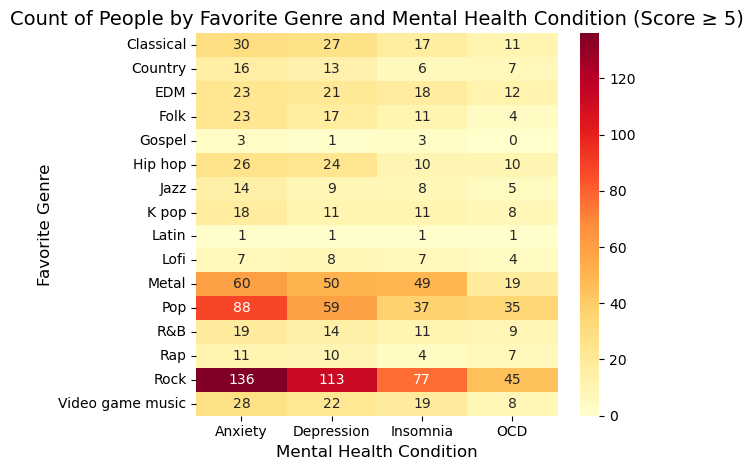

In [3]:
conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
genre_data = {}

for condition in conditions:
    filtered = df[df[condition] >= 5]
    genre_counts = filtered['Fav genre'].value_counts()
    genre_data[condition] = genre_counts

df_plot = pd.DataFrame(genre_data).fillna(0)

sns.heatmap(df_plot, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Count of People by Favorite Genre and Mental Health Condition (Score ≥ 5)', fontsize=14)
plt.ylabel('Favorite Genre', fontsize=12)
plt.xlabel('Mental Health Condition', fontsize=12)
plt.tight_layout()
plt.show()

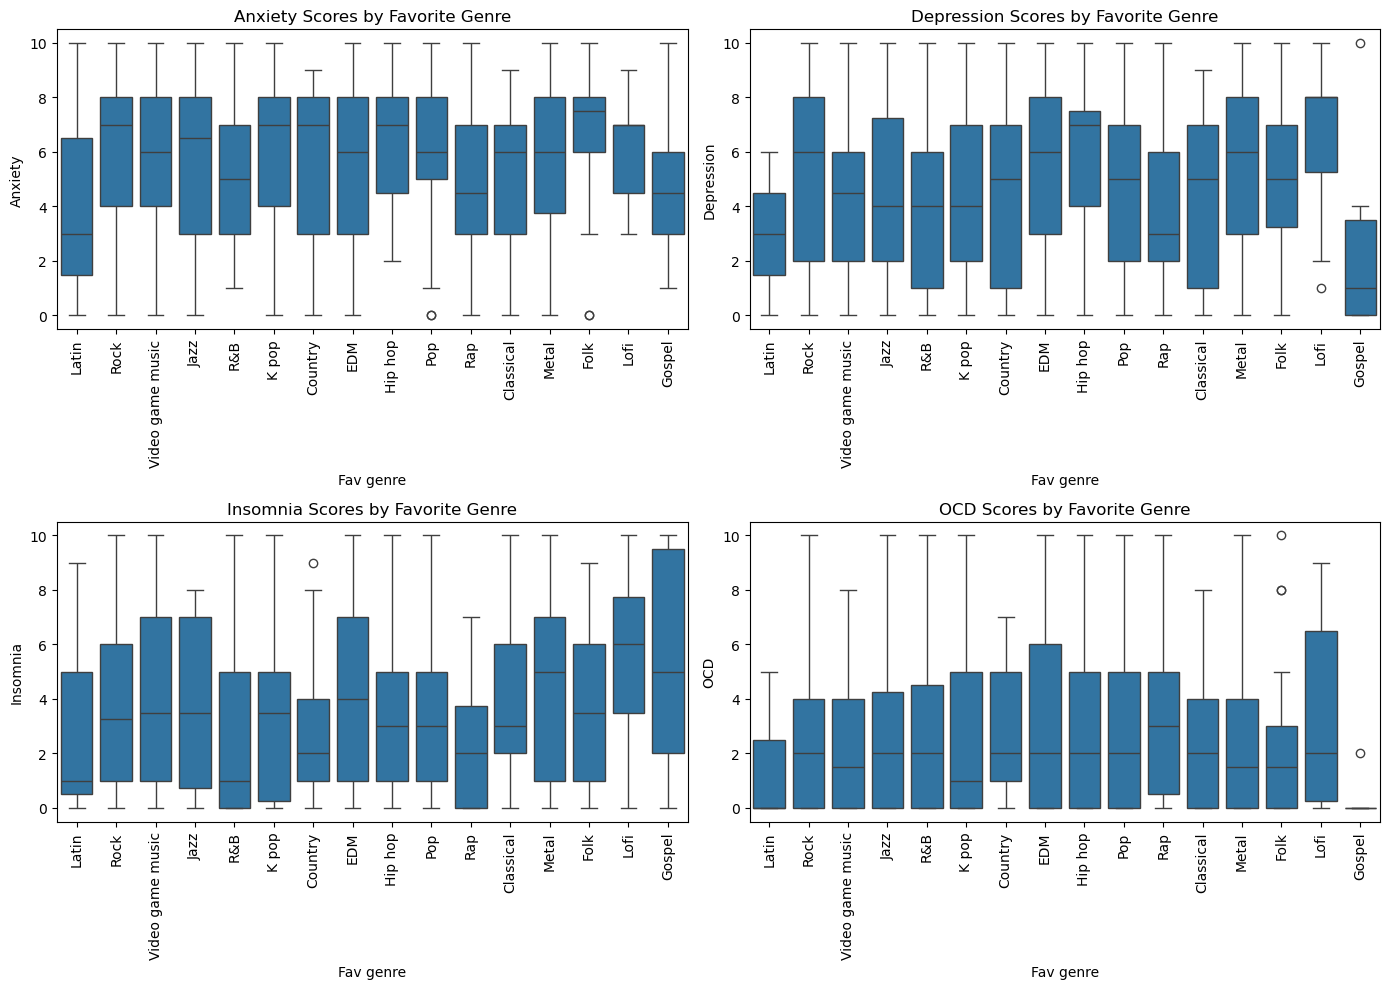

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

for i, condition in enumerate(conditions):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df, x='Fav genre', y=condition, ax=ax)
    ax.set_title(f'{condition} Scores by Favorite Genre')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

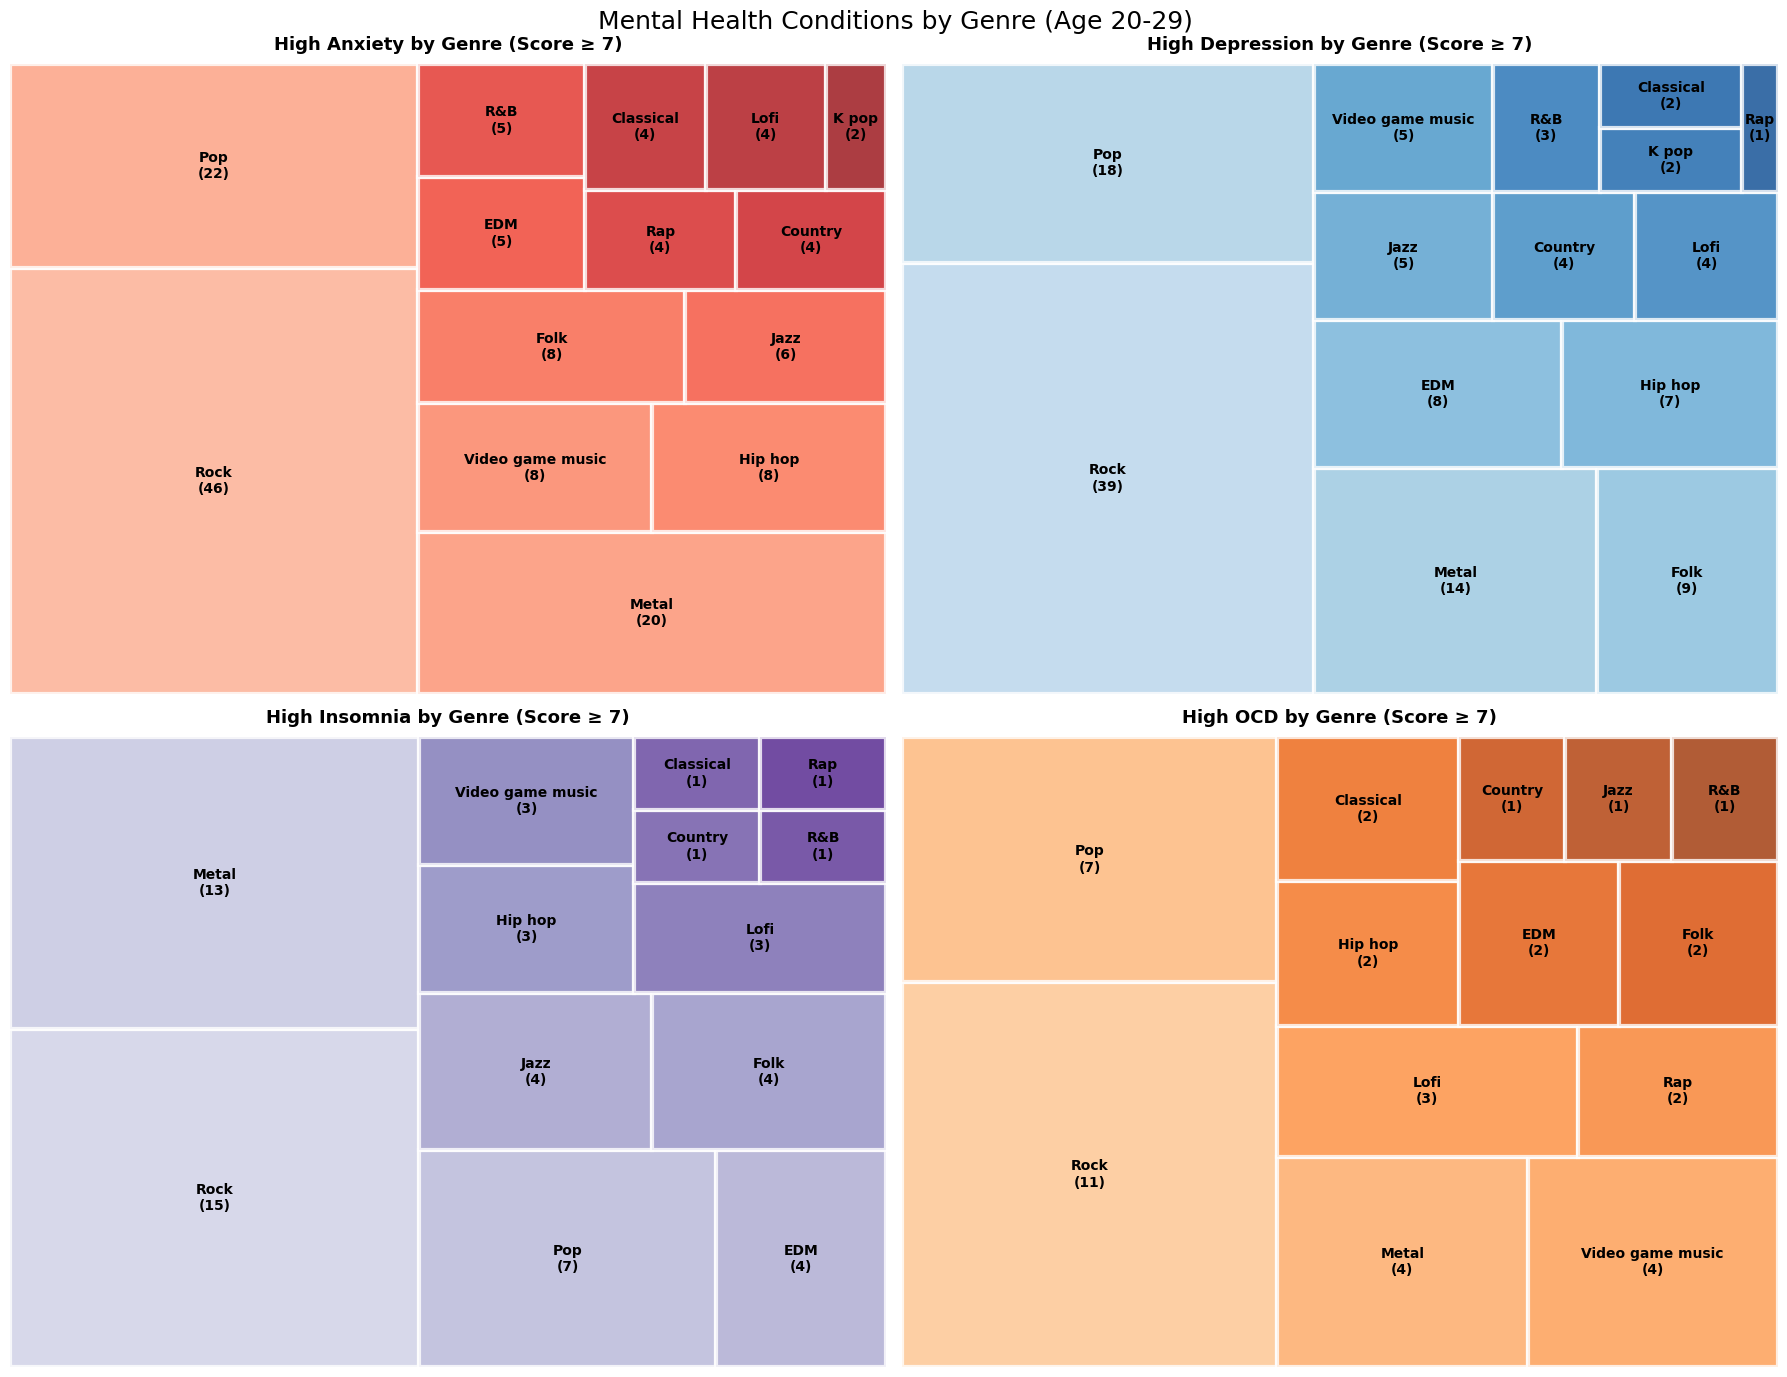

In [11]:
import squarify
conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

age_20s = df[df['Age Group'] == '20-29']
color_maps = [plt.cm.Reds, plt.cm.Blues, plt.cm.Purples, plt.cm.Oranges]

for idx, condition in enumerate(conditions):
    ax = axes[idx // 2, idx % 2]
    
    filtered = age_20s[age_20s[condition] >= 7]
    genre_counts = filtered['Fav genre'].value_counts()
    
    colors = color_maps[idx](np.linspace(0.3, 0.9, len(genre_counts)))
    
    squarify.plot(sizes=genre_counts.values,
                  label=[f"{genre}\n({count})" for genre, count in zip(genre_counts.index, genre_counts.values)],
                  color=colors, alpha=0.8, edgecolor='white', linewidth=3, ax=ax,
                  text_kwargs={'fontsize': 10, 'weight': 'bold'})
    
    ax.set_title(f'High {condition} by Genre (Score ≥ 7)', 
                 fontsize=13, weight='bold', pad=10)
    
    ax.axis('off')

fig.suptitle('Mental Health Conditions by Genre (Age 20-29)', fontsize=18)
plt.tight_layout()
plt.show()

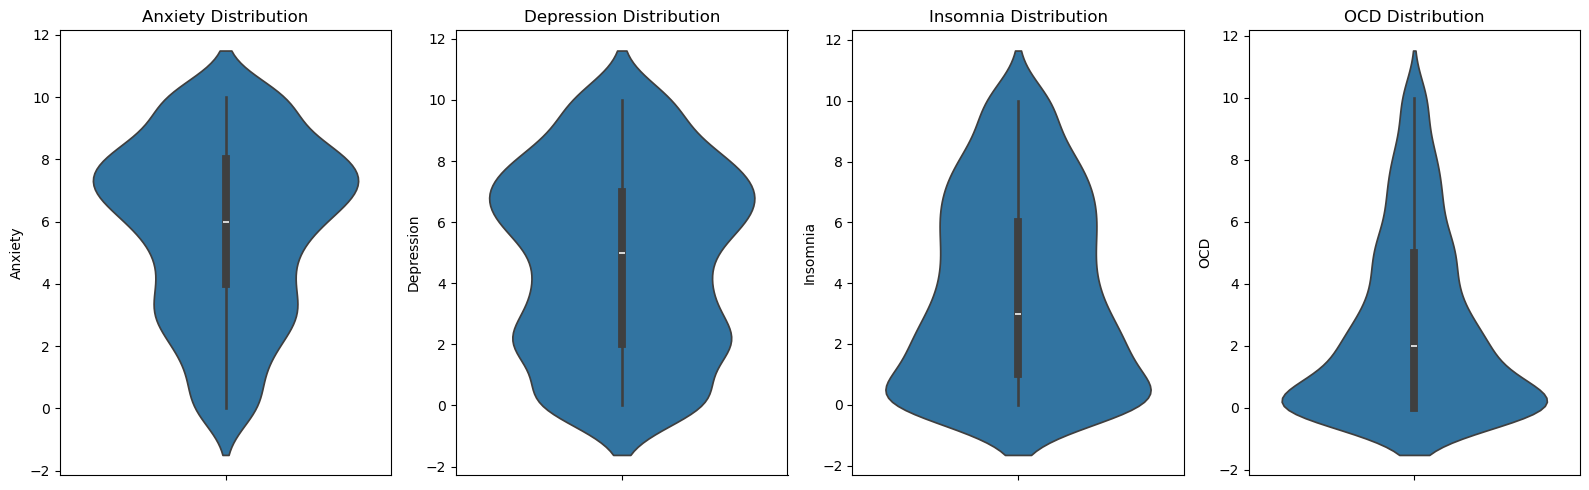

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
for i, condition in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD']):
    sns.violinplot(data=df, y=condition, ax=axes[i])
    axes[i].set_title(f'{condition} Distribution')
plt.tight_layout()
plt.show()

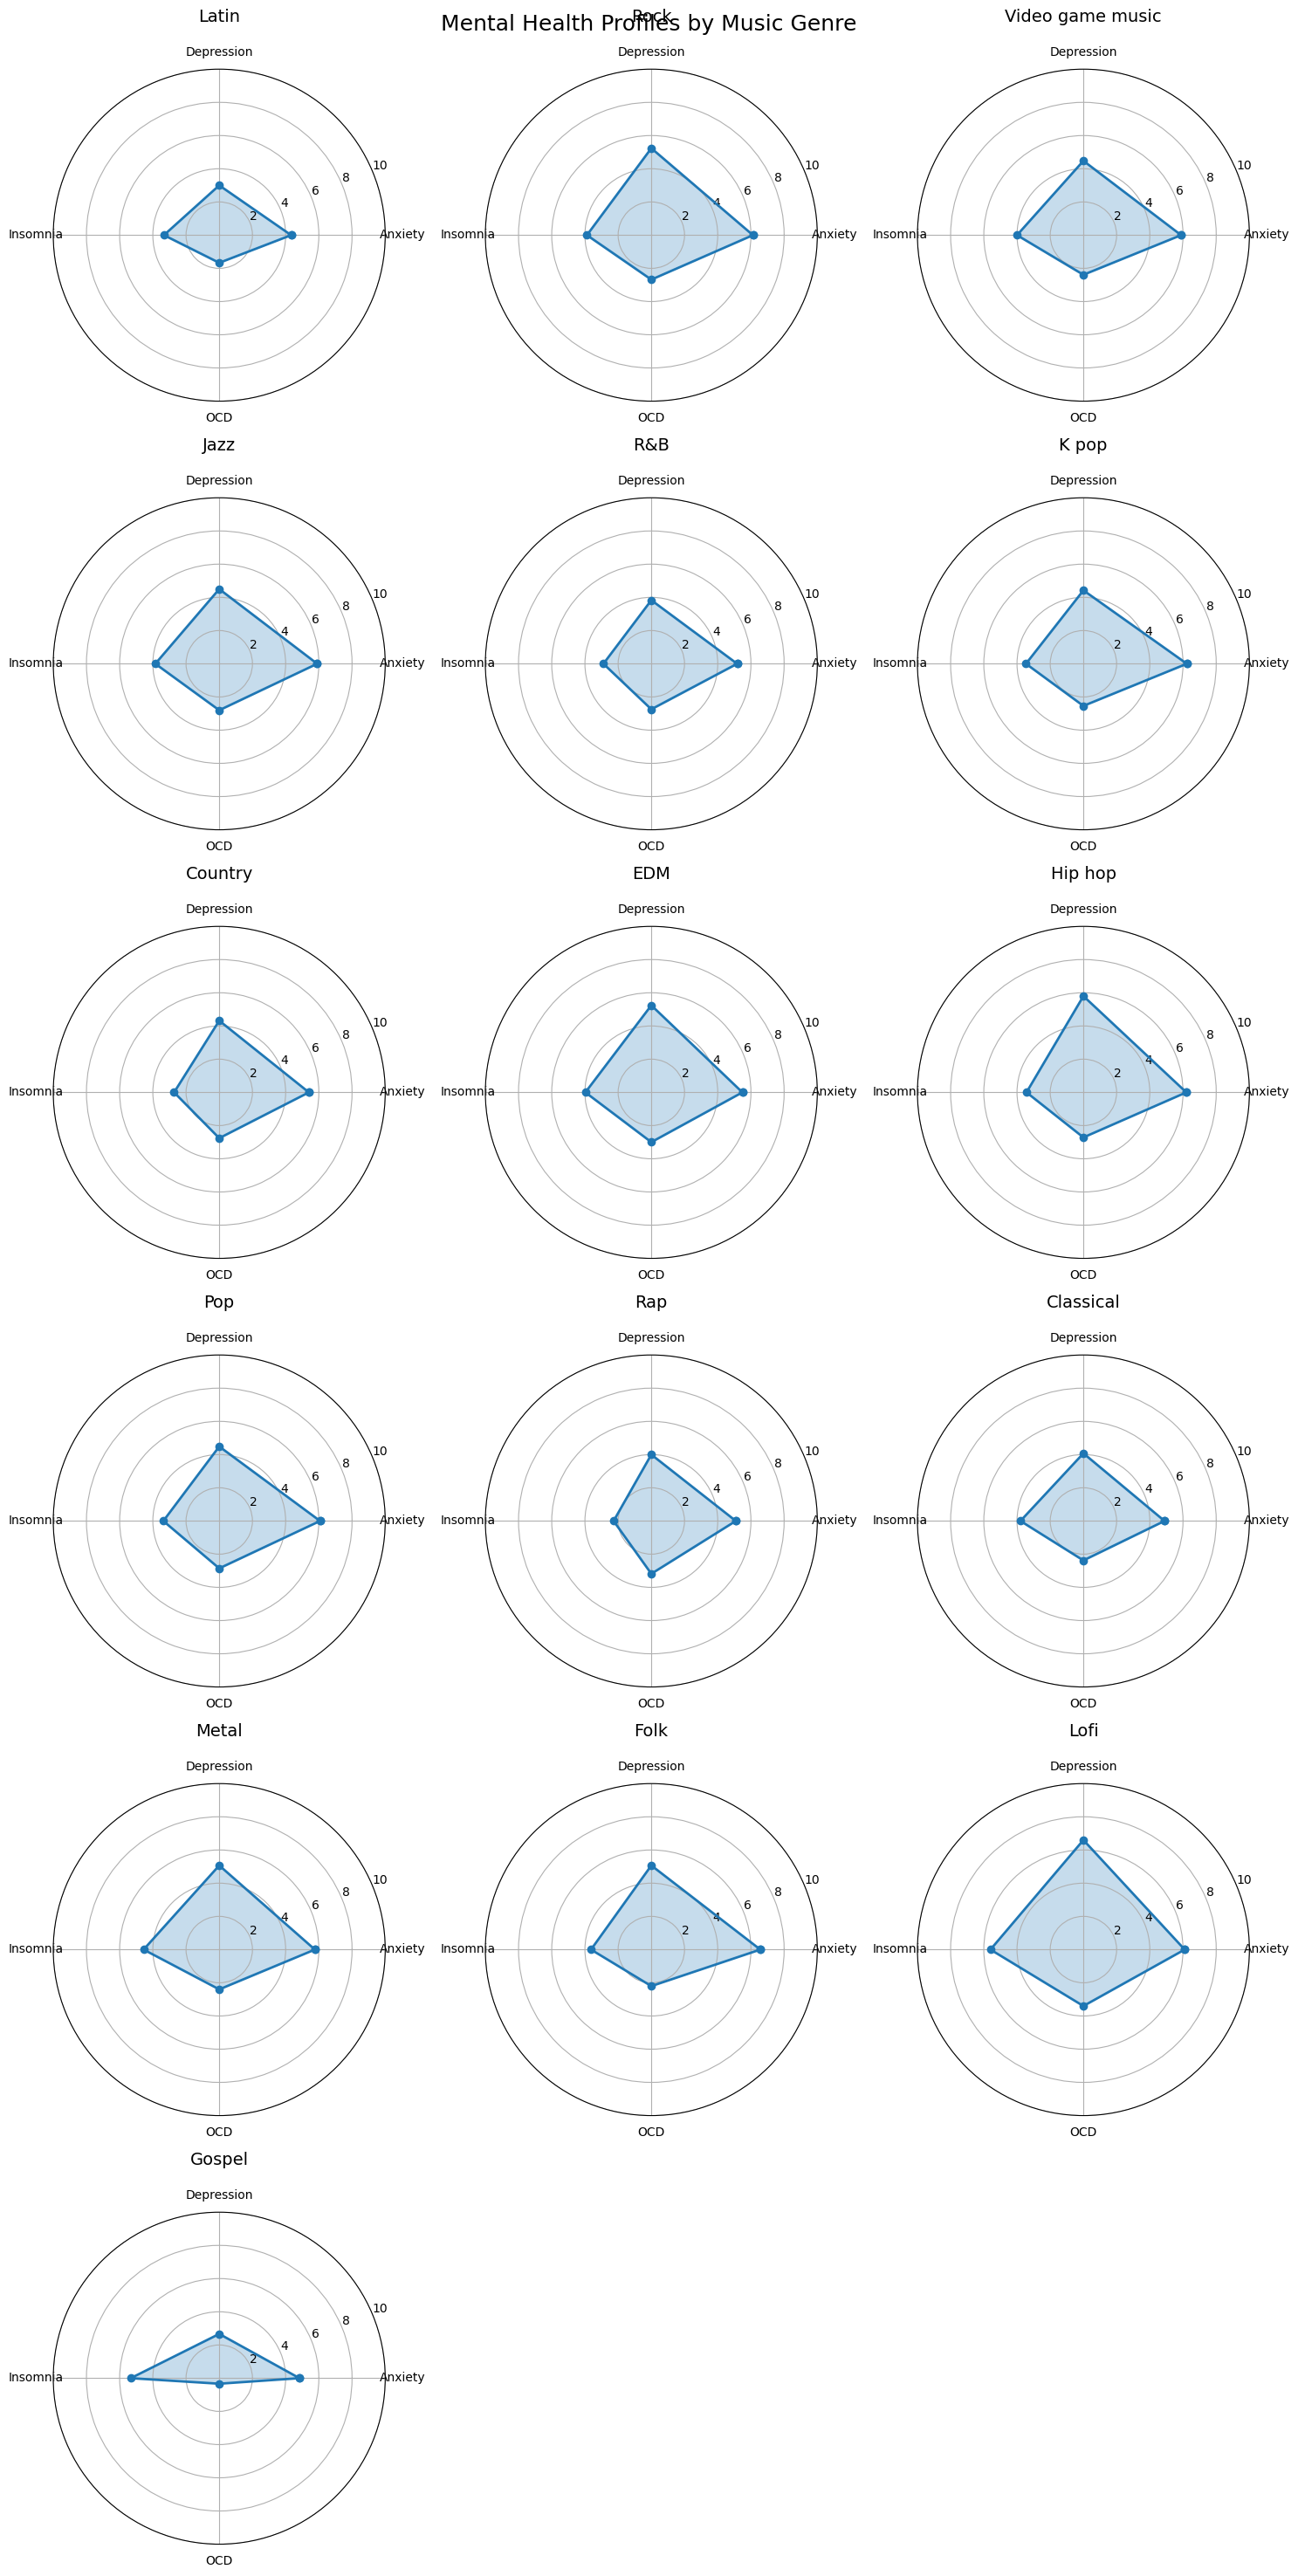

In [15]:
genres = df['Fav genre'].unique()

n_genres = len(genres)
n_cols = 3
n_rows = int(np.ceil(n_genres / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), 
                         subplot_kw=dict(projection='polar'))
axes = axes.flatten()

conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
angles = [n / float(len(conditions)) * 2 * np.pi for n in range(len(conditions))]
angles += angles[:1]

for i, genre in enumerate(genres):
    genre_avg = df[df['Fav genre'] == genre][conditions].mean()
    values = list(genre_avg.values)
    values += values[:1]
    
    ax = axes[i]
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(conditions, size=10)
    ax.set_ylim(0, 10)
    ax.set_title(f'{genre}', size=14, pad=20)
    ax.grid(True)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Mental Health Profiles by Music Genre', size=18, y=0.98)
plt.tight_layout()
plt.show()

/var/folders/0l/s1l2ffnj4xzfb54jmp1tvk080000gn/T/ipykernel_47867/2231245779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = df['Age Group'].astype(str)
/var/folders/0l/s1l2ffnj4xzfb54jmp1tvk080000gn/T/ipykernel_47867/2231245779.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


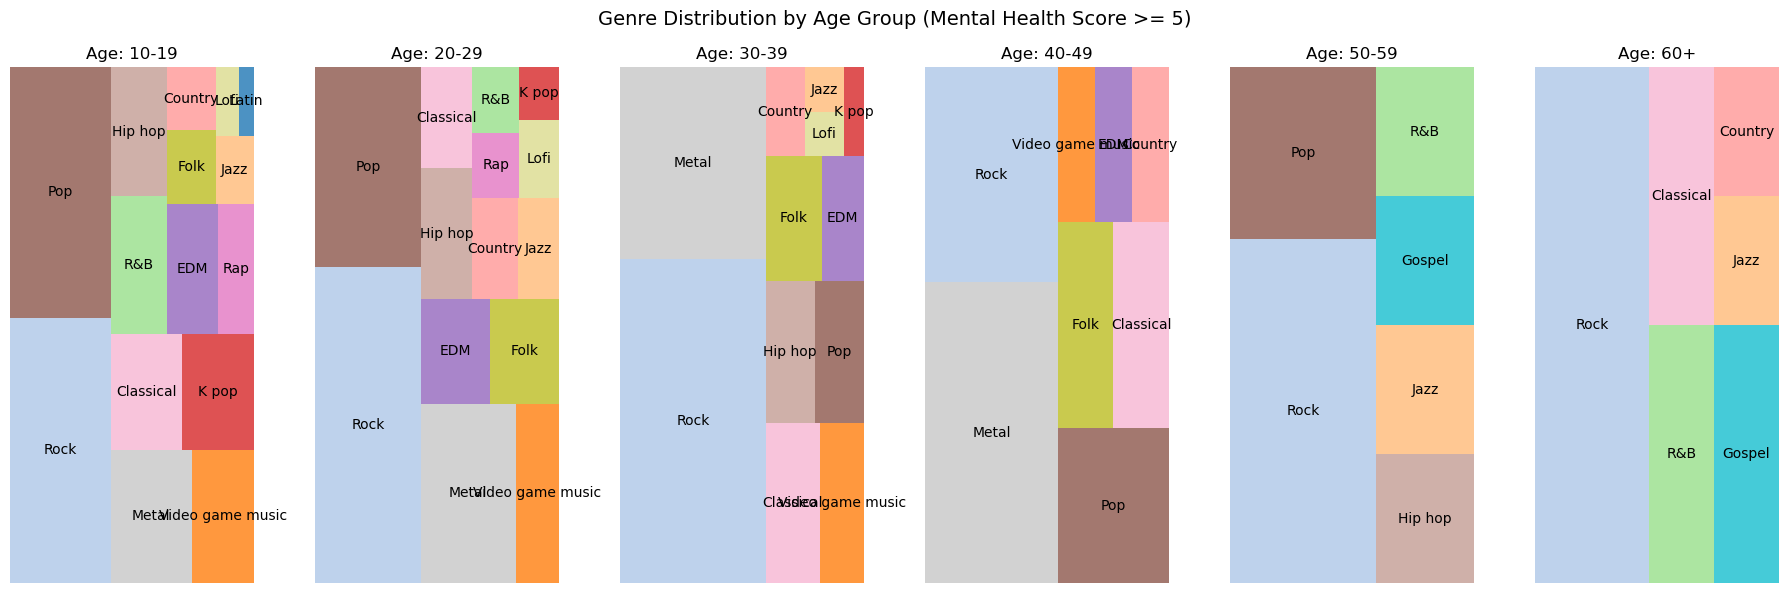

In [25]:
import matplotlib.cm as cm
df['Age Group'] = df['Age Group'].astype(str)
df = df[df['Age Group'] != 'nan']
age_order = ['10-19', '20-29', '30-39', '40-49', '50-59', '60+']
age_groups = [age for age in age_order if age in df['Age Group'].unique()]

all_genres = df['Fav genre'].unique()
cmap = cm.get_cmap('tab20')
genre_colors = {genre: cmap(i/len(all_genres)) for i, genre in enumerate(all_genres)}

fig, axes = plt.subplots(1, len(age_groups), figsize=(18, 6))

for i, age_group in enumerate(age_groups):
    people_in_this_age = df[df['Age Group'] == age_group]
    high_scorers = people_in_this_age[(people_in_this_age['Anxiety'] >= 5) | 
                                       (people_in_this_age['Depression'] >= 5) | 
                                       (people_in_this_age['Insomnia'] >= 5) | 
                                       (people_in_this_age['OCD'] >= 5)]
    
    genre_counts = high_scorers['Fav genre'].value_counts()
    
    ax = axes[i]
    colors = [genre_colors[genre] for genre in genre_counts.index]
    
    squarify.plot(sizes=genre_counts.values,
                 label=genre_counts.index,
                 alpha=0.8,
                 ax=ax,
                 color=colors,
                 text_kwargs={'fontsize': 10})
    ax.set_title(f'Age: {age_group}', fontsize=12)
    ax.axis('off')

plt.suptitle('Genre Distribution by Age Group (Mental Health Score >= 5)', fontsize=14)
plt.tight_layout()
plt.show()

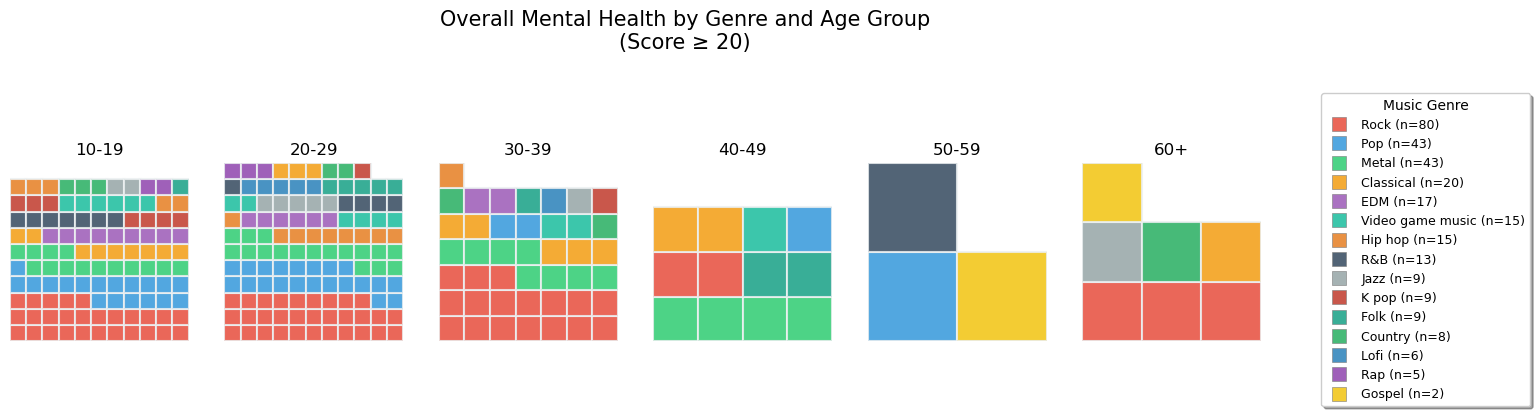

In [31]:
age_list = sorted(df['Age Group'].unique())
fig, axes = plt.subplots(1, len(age_list), figsize=(18, 5))

all_filtered = df[df['Overall MH'] >= 20]
all_genre_counts = all_filtered['Fav genre'].value_counts()
all_genres = all_genre_counts.index.tolist()

color_options = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
                '#1abc9c', '#e67e22', '#34495e', '#95a5a6', '#c0392b',
                '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#f1c40f',
                '#d35400', '#7f8c8d', '#2c3e50']
genre_color_map = {genre: color_options[i % len(color_options)] 
                   for i, genre in enumerate(all_genres)}

for age_idx, age in enumerate(age_list):
    ax = axes[age_idx]
    
    filtered = df[(df['Age Group'] == age) & (df['Overall MH'] >= 20)]
    genre_counts = filtered['Fav genre'].value_counts()
    
    # if len(genre_counts) > 0:
    genres = genre_counts.index.tolist()
    colors = [genre_color_map[g] for g in genres]
    
    # Calculate grid size based on actual count
    total_count = genre_counts.sum()
    grid_size = int(np.ceil(np.sqrt(total_count)))
    rows = grid_size
    cols = grid_size
    
    count = 0
    
    for row in range(rows):
        for col in range(cols):
            if count < total_count:
                genre_idx = 0
                cumsum = 0
                for g_idx, num in enumerate(genre_counts.values):
                    cumsum += num
                    if count < cumsum:
                        genre_idx = g_idx
                        break
                
                ax.add_patch(plt.Rectangle((col, row), 1, 1, 
                                           facecolor=colors[genre_idx], 
                                           edgecolor='#ecf0f1', linewidth=1.5,
                                           alpha=0.85))
            count += 1
    
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'{age}')

# Create legend with ALL genres
handles = []
labels = []
for genre in all_genres:
    count = all_genre_counts[genre]
    handle = plt.Line2D([0], [0], marker='s', color='w', 
                       markerfacecolor=genre_color_map[genre], 
                       markersize=10, alpha=0.85, 
                       markeredgecolor='gray', markeredgewidth=0.5)
    handles.append(handle)
    labels.append(f"{genre} (n={count})")

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), 
          fontsize=9, frameon=True, fancybox=True, shadow=True,
          title='Music Genre', title_fontsize=10)

fig.suptitle('Overall Mental Health by Genre and Age Group\n(Score ≥ 20)', 
             fontsize=15, weight='normal', y=0.98, fontfamily='sans-serif')

plt.subplots_adjust(right=0.82)
plt.show()